# STDSR 2023 Assignment 2

## Oksana Konovalova B21-DS-02

o.konovalova@innopolis.university

# Task 1 in python


Task 1 is also made in a pdf file. 

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the data
n = 116
x = 17

##### *1. What is the conditional distribution of X, the number of samples containing Giardia cysts, given θ?*

The conditional distribution of X, given θ, is a binomial distribution with parameters n=116 and θ, denoted as X~Bin(116,θ).


##### *2. Before the experiment, the NIWA scientists elicited that the expected value of θ is 0.2 with a standard deviation of 0.16. Determine the parameters α and β of a Beta prior distribution for θ with this prior mean and standard deviation. (Round α and β to the nearest integer).*



In [2]:
# Prior distribution
prior_mean = 0.2
prior_sd = 0.16
alpha = round(prior_mean**2 * (1 - prior_mean) / prior_sd**2, 0)
beta = round(alpha * (1 - prior_mean) / prior_mean, 0)
prior = stats.beta(alpha, beta)
print(f"alpha = {alpha} and beta = {beta}")

alpha = 1.0 and beta = 4.0


##### *3. 	Find the posterior distribution of θ and summarize it by its posterior mean and standard deviation.* 



In [3]:
# Posterior distribution
alpha_post = alpha + x
beta_post = beta + n - x
posterior = stats.beta(alpha_post, beta_post)

# Summary statistics
post_mean = posterior.mean()
post_sd = posterior.std()

print(f' posterior mean = {post_mean}\n posterior standard deviation = {post_sd}')

 posterior mean = 0.1487603305785124
 posterior standard deviation = 0.03221733249847173


##### *4.	Plot the prior, posterior and normalized likelihood.*

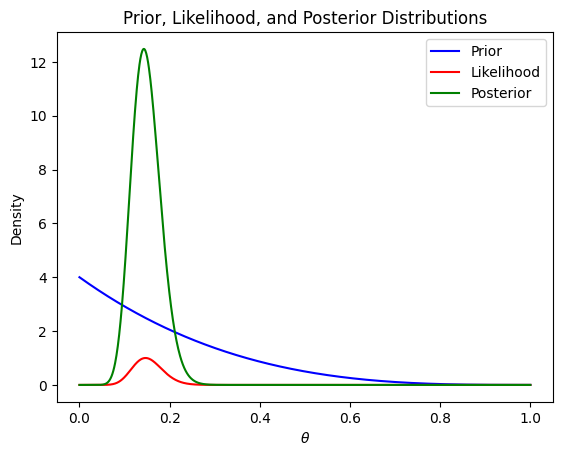

In [4]:
# Plot the prior, likelihood, and posterior distributions
theta = np.linspace(0, 1, 1000)
prior_pdf = prior.pdf(theta)
likelihood = stats.binom.pmf(x, n, theta)
normalized_likelihood = likelihood / np.max(likelihood)
posterior_pdf = posterior.pdf(theta)

plt.plot(theta, prior_pdf, label='Prior', color='blue')
plt.plot(theta, normalized_likelihood, label='Likelihood', color='red')
plt.plot(theta, posterior_pdf, label='Posterior', color='green')
plt.legend()
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.show()

##### *5. Find the posterior probability that θ < 0.1*

In [5]:
# Posterior probability that θ < 0.1
post_prob = posterior.cdf(0.1)
print(f'Posterior probability that θ < 0.1: {post_prob}')

Posterior probability that θ < 0.1: 0.053094376993042654


##### *6. Find a central 95% posterior credible interval for θ.*


In [6]:
# 95% credible interval for θ
cred_int = posterior.interval(0.95)
print(f'95% Credible Interval for θ: ({cred_int[0]}, {cred_int[1]})')

95% Credible Interval for θ: (0.09138957252823, 0.21710689824337648)


# Task 2

## Implementation

#### Implementation of the basic method UCB1

In [7]:
# Finds the maximum value index
def ind_max(x):

  m = max(x)
  return x.index(m)

In [8]:
# Code from lab 13

import math

# Class for the UCB1 algorithm
class UCB1():


      # Constructor for the UCB1 class
      def __init__(self, counts=[], values=[]):
        self.counts = counts
        self.values = values
        return
      

      # Initializing counts and values arrays with zeros
      def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return


      # Selecting arm based on UCB1 algorithm
      def select_arm(self):

        # If an arm has never been pulled, return it
        n_arms = len(self.counts)
        for arm in range(n_arms):
          if self.counts[arm] == 0:
            return arm

        # Calculate UCB values for each arm and return arm with the highest UCB value
        ucb_values = [0.0 for arm in range(n_arms)]
        total_counts = sum(self.counts)
        for arm in range(n_arms):
          bonus = math.sqrt((2 * math.log(total_counts)) / float(self.counts[arm]))
          ucb_values[arm] = self.values[arm] + bonus
        return ind_max(ucb_values)
      

      # Update counts and values for the selected arm with new reward
      def update(self, arm_idx, reward):
        self.counts[arm_idx] = self.counts[arm_idx] + 1
        n = self.counts[arm_idx]

        value = self.values[arm_idx]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[arm_idx] = new_value
        return

In [9]:
import random

# Generate a random number of arms between 3 and 20
# This data is the same for all implementation, so it is easier to compare them
n_arms = random.randint(3, 20)
num_plays = 100
print(n_arms)

In [10]:
ucb1 = UCB1()
ucb1.initialize(n_arms)

for i in range(num_plays):
    n_arm = ucb1.select_arm()
    ucb1.update(n_arm, 1)

print("Estimated expected reward:", ucb1.values)
print("Number of times each arm was pulled:", ucb1.counts)

Estimated expected reward: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Number of times each arm was pulled: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5]


#### Implementation of the Thompson Sampling for Bernoulli reward


In [11]:
from scipy.stats import beta

# Class for the Thompson Sampling algorithm for Bernoulli-distributed rewards
class ThompsonSamplingBernoulli():


    # Constructor for the ThompsonSamplingBernoulli class
    def __init__(self, counts=[], values=[], alpha=[], beta=[]):
        self.counts = counts
        self.values = values
        self.alpha = alpha
        self.beta = beta
        return


    # Initializing counts and values arrays with zeros, alpha and beta arrays with one
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        self.alpha = [1 for col in range(n_arms)]
        self.beta = [1 for col in range(n_arms)]
        return


    # Selecting arm based on Thompson Sampling algorithm for Bernoulli-distributed rewards
    def select_arm(self):
        n_arms = len(self.counts)
        # Generate a random sample from a Beta distribution for each arm
        samples = [beta.rvs(self.alpha[i], self.beta[i]) for i in range(n_arms)]
        return ind_max(samples)
    

    # Update counts, values, alpha, and beta for the selected arm with new reward
    def update(self, arm_idx, reward):

        self.counts[arm_idx] = self.counts[arm_idx] + 1
        n = self.counts[arm_idx]
        value = self.values[arm_idx]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[arm_idx] = new_value

        self.alpha[arm_idx] += reward
        self.beta[arm_idx] += 1 - reward
        return


In [12]:
# Function to create a list of random probabilities for each arm
def create_prob(n_arms):
        p = [random.random() for col in range(n_arms)]
        return p


# Function to generate a Bernoulli-distributed reward based on a given probability
def reward_bernoulli(p):
    if random.random() > p:
        return 0.0
    return 1.0


In [13]:
tsb = ThompsonSamplingBernoulli()
tsb.initialize(n_arms)

# Create a list of probabilities for each arm
probs = create_prob(n_arms)

for i in range(num_plays):
    n_arm = tsb.select_arm()
    tsb.update(n_arm, reward_bernoulli(probs[n_arm]))

print("Estimated expected reward:", tsb.values)
print("Number of times each arm was pulled:", tsb.counts)

Estimated expected reward: [0.0, 0.8571428571428568, 0.0, 0.4, 0.0, 0.3333333333333333, 0.5000000000000001, 0.0, 0.8292682926829268, 0.3333333333333333, 0.0, 0.0, 0.5, 0.25, 0.0, 0.5, 0.0]
Number of times each arm was pulled: [1, 21, 2, 5, 1, 3, 6, 1, 41, 3, 2, 2, 2, 4, 2, 2, 2]


#### Implementation of the Thompson Sampling for Gaussian reward

In [14]:
import numpy as np


# Class for the Thompson Sampling algorithm for Gaussian-distributed rewards
class ThompsonSamplingGaussian():


    # Constructor for the ThompsonSamplingGaussian class
    def __init__(self, counts=[], values=[], mu=[], sigma=[]):
        self.counts = counts
        self.values = values
        self.mu = mu
        self.sigma = sigma
        return


    # Initializing counts and values arrays with zeros, mu and sigma arrays with one
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        self.mu = [1 for col in range(n_arms)]
        self.sigma = [1 for col in range(n_arms)]
        return
        

    # Selecting arm based on Thompson Sampling algorithm for Gaussian-distributed rewards
    def select_arm(self):
        n_arms = len(self.counts)
        # Sample values from normal distribution with mean and variance estimates
        samples = [np.random.normal(self.mu[i], self.sigma[i]) for i in range(n_arms)]
        return ind_max(samples)
    
    # Update counts, values, mu, and sigma for the selected arm with new reward
    def update(self, arm_idx, reward):

        self.counts[arm_idx] = self.counts[arm_idx] + 1
        n = self.counts[arm_idx]
        value = self.values[arm_idx]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[arm_idx] = new_value

        self.mu[arm_idx] = (self.mu[arm_idx] * self.sigma[arm_idx]**2 + reward * self.sigma[arm_idx]**2) / (self.sigma[arm_idx]**2 + 1)
        self.sigma[arm_idx] = np.sqrt(1 / (1 / self.sigma[arm_idx]**2 + 1))
        return


    def update(self, arm, reward):
        self.posterior_variance[arm] = 1 / (1/self.prior_variance + reward**2)
        self.posterior_mean[arm] = self.posterior_variance[arm] * (self.prior_mean/self.prior_variance + reward)


In [15]:
# Function to create a list of random values for means and variance
def create_m(n_arms):
        p = [random.randint(1, 15) for col in range(n_arms)]
        return p

# Function to generate a reward value for an arm with given mean and variance
def reward_gaussian(mu, sigma):
    return np.random.normal(mu, sigma)


In [16]:
# Generate random means and variances for each arm
# This data is the same for TS and UCB, so it is easier to compare them
mus = create_m(n_arms)
sigmas = create_m(n_arms)


In [17]:
tsg = ThompsonSamplingGaussian()
tsg.initialize(n_arms)

for i in range(num_plays):
    n_arm = tsg.select_arm()
    tsg.update(n_arm, reward_gaussian(mus[n_arm], sigmas[n_arm]))

print("Estimated expected reward:", tsg.values)
print("Number of times each arm was pulled:", tsg.counts)

Estimated expected reward: [7.007257902597827, 7.016326825952972, 0.16011414555513226, 26.040287297541383, 4.445150402794035, 5.491443026366508, 9.662111795329661, 14.067302523318764, 18.74113334884871, -7.338809658751138, 10.914811562757123, 7.244727746471394, 12.95261277514833, 8.17465762705031, 14.703623380067718, 9.735085877425968, 13.668090075382972]
Number of times each arm was pulled: [4, 3, 1, 6, 3, 7, 7, 10, 10, 2, 7, 4, 10, 5, 5, 5, 11]


#### Implementation of the UCB for Gaussian reward

In [18]:
# Class for the UCB algorithm for Gaussian-distributed rewards
class UCBGaussian():

  # Constructor for the UCBGaussian class
  def __init__(self, c, counts=[], values=[]):
    self.counts = counts
    self.values = values
    self.c = c
    return
  
  # Initializing counts and values arrays with zeros
  def initialize(self, n_arms):
    self.counts = [0 for col in range(n_arms)]
    self.values = [0.0 for col in range(n_arms)]
    return
  
  # Selecting arm based on UCB algorithm for Gaussian-distributed rewards
  def select_arm(self):
    n_arms = len(self.counts)
    for arm in range(n_arms):
      if self.counts[arm] == 0:
        return arm

    ucb_values = [0.0 for arm in range(n_arms)]
    total_counts = sum(self.counts)
    for arm in range(n_arms):
      bonus = self.c * math.sqrt((2 * math.log(total_counts)) / float(self.counts[arm]))
      ucb_values[arm] = self.values[arm] + bonus
    return ind_max(ucb_values)
  
  # Update counts and values for the selected arm with new reward
  def update(self, arm_idx, reward):
    self.counts[arm_idx] = self.counts[arm_idx] + 1
    n = self.counts[arm_idx]

    value = self.values[arm_idx]
    new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
    self.values[arm_idx] = new_value
    return
  

In [19]:
# c = 2
ucb = UCBGaussian(2)
ucb.initialize(n_arms)

for i in range(num_plays):
    n_arm = ucb.select_arm()
    ucb.update(n_arm, reward_gaussian(mus[n_arm], sigmas[n_arm]))


print("Estimated expected reward:", ucb.values)
print("Number of times each arm was pulled:", ucb.counts)

Estimated expected reward: [6.950362400049569, 12.076177182959933, -4.644905767720429, 14.917956789082163, 5.5905106970233405, 7.8840306297318135, 7.28307124045703, 13.897487797062897, -8.730423962511527, 11.292266074948085, 1.6635517262515194, -2.537433158832716, 14.804919743877976, 4.222359836305685, 9.880870994058862, 4.775100936591519, 7.945955189121243]
Number of times each arm was pulled: [1, 3, 1, 43, 3, 1, 1, 9, 1, 6, 1, 1, 24, 2, 1, 1, 1]
